# Feature Scaling
## Standardization & Normalization

In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv(r'C:\Users\User\Desktop\FinalYear proj\Implementation\Dataset\seaborn-data-master\titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.shape

(891, 15)

In [12]:
df2 = df[['survived',"pclass",'age', 'sibsp','parch','fare']]
df2.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [13]:
df2.isnull().sum().sum()

177

In [14]:
#Replace null values by mean value
df3 = df2.fillna(df2.mean())

In [16]:
df3.isnull().sum().sum()

0

In [17]:
#Scaling should be applied only after train, test split
#Following code creates dependent and independent variable
#Survived is the dependent/target variable, so remove from x
X = df3.drop("survived", axis = 1)
y = df3["survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 5)
Shape of y =  (891,)


In [18]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (712, 5)
Shape of y_train =  (712,)
Shape of X_test =  (179, 5)
Shape of y_test =  (179,)


### Standardization using StandardScaler()

In [19]:
sc = StandardScaler()

#fit() method is used to learn the mean and standard deviation of each feature from the training data
sc.fit(X_train)

StandardScaler()

In [20]:
 #Returns a numpy array that contains the mean value of each feature in the training data used to fit the scaler
sc.mean_

array([ 2.33005618, 29.53822538,  0.55337079,  0.37921348, 32.58627612])

In [9]:
 #Returns a numpy array that contains the standard deviation of each feature in the training data used to fit the scaler
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [21]:
X_train.describe()

,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.538225,0.553371,0.379213,32.586276
std,0.824584,12.994548,1.176404,0.791669,51.969529
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.925000
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,30.500000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#applies the scaling transformation that was learned during the fitting process
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [24]:
X_train_sc

array([[-1.61413602,  1.22920747, -0.47072241, -0.47934164, -0.07868358],
       [-0.40055118, -0.50350514, -0.47072241, -0.47934164, -0.37714494],
       [ 0.81303367,  0.18957991, -0.47072241, -0.47934164, -0.47486697],
       ...,
       [ 0.81303367,  0.88266495,  1.23056874, -0.47934164, -0.35580399],
       [-1.61413602, -1.19659018,  0.37992316,  2.04874166,  1.68320121],
       [-1.61413602, -0.65752403, -0.47072241,  0.78470001,  0.86074761]])

In [25]:
#.transform() returns a numpy aray, so convert it to data frame
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["pclass",'age', 'sibsp','parch','fare'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age', 'sibsp','parch','fare'])

In [26]:
X_train_sc.head()

,pclass,age,sibsp,parch,fare
0,-1.614136,1.229207,-0.470722,-0.479342,-0.078684
1,-0.400551,-0.503505,-0.470722,-0.479342,-0.377145
2,0.813034,0.189580,-0.470722,-0.479342,-0.474867
3,0.813034,-0.272477,0.379923,-0.479342,-0.476230
4,0.813034,-1.812666,2.931860,2.048742,-0.025249


In [28]:
X_train_sc.describe()

,pclass,age,sibsp,parch,fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,9.355812e-17,1.122697e-17,1.746418e-17,2.245395e-17,5.363999e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.614136e+00,-2.242379e+00,-4.707224e-01,-4.793416e-01,-6.274674e-01
25%,-4.005512e-01,-5.805146e-01,-4.707224e-01,-4.793416e-01,-4.748670e-01
50%,8.130337e-01,1.239022e-02,-4.707224e-01,-4.793416e-01,-3.491435e-01
75%,8.130337e-01,4.206083e-01,3.799232e-01,-4.793416e-01,-4.017244e-02
max,8.130337e-01,3.886033e+00,6.334442e+00,7.104908e+00,9.237724e+00


In [29]:
X_train_sc.describe().round(2)

,pclass,age,sibsp,parch,fare
count,712.00,712.00,712.00,712.00,712.00
mean,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.61,-2.24,-0.47,-0.48,-0.63
25%,-0.40,-0.58,-0.47,-0.48,-0.47
50%,0.81,0.01,-0.47,-0.48,-0.35
75%,0.81,0.42,0.38,-0.48,-0.04
max,0.81,3.89,6.33,7.10,9.24


### Normalization using MinMaxScaler() 

In [30]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [31]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [32]:
X_train_mmc

array([[0.        , 0.56647399, 0.        , 0.        , 0.0556283 ],
       [0.5       , 0.28373963, 0.        , 0.        , 0.02537431],
       [1.        , 0.39683338, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.50992712, 0.25      , 0.        , 0.02753757],
       [0.        , 0.17064589, 0.125     , 0.33333333, 0.2342244 ],
       [0.        , 0.25860769, 0.        , 0.16666667, 0.15085515]])

In [34]:
X_train_mmc =  pd.DataFrame(X_train_mmc, columns = ["pclass",'age', 'sibsp','parch','fare'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["pclass",'age', 'sibsp','parch','fare'])

In [35]:
X_train_mmc.describe().round(2)

,pclass,age,sibsp,parch,fare
count,712.00,712.00,712.00,712.00,712.00
mean,0.67,0.37,0.07,0.06,0.06
std,0.41,0.16,0.15,0.13,0.10
min,0.00,0.00,0.00,0.00,0.00
25%,0.50,0.27,0.00,0.00,0.02
50%,1.00,0.37,0.00,0.00,0.03
75%,1.00,0.43,0.12,0.00,0.06
max,1.00,1.00,1.00,1.00,1.00


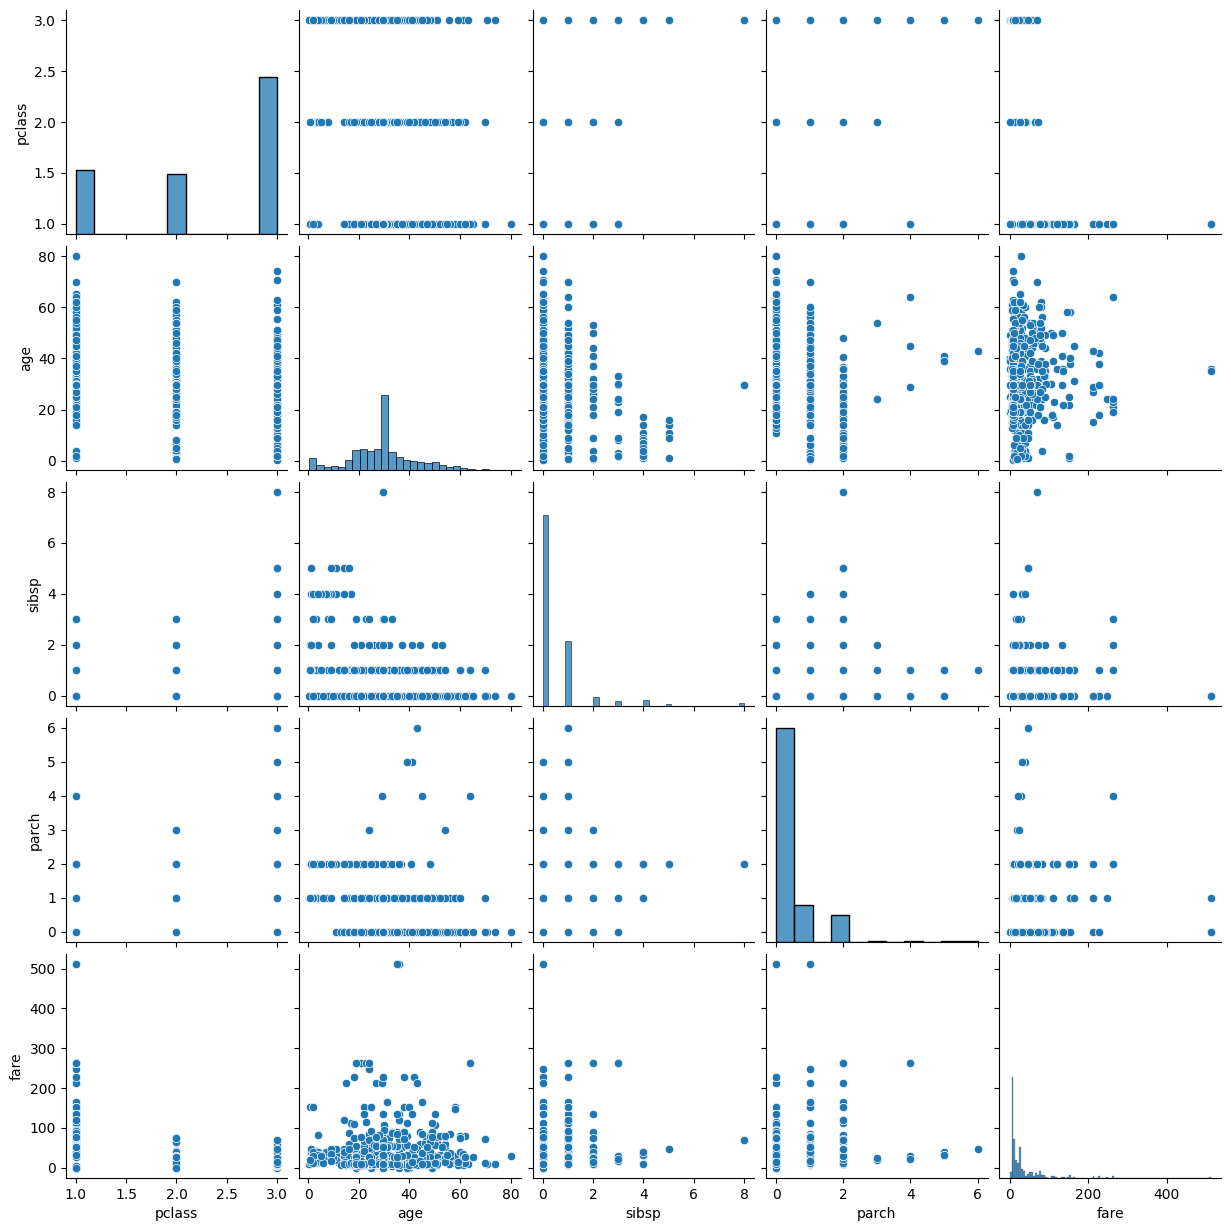

In [36]:
#pairplot() creates a grid of scatterplots, where each plot shows the relationship between two features
sns.pairplot(X_train)

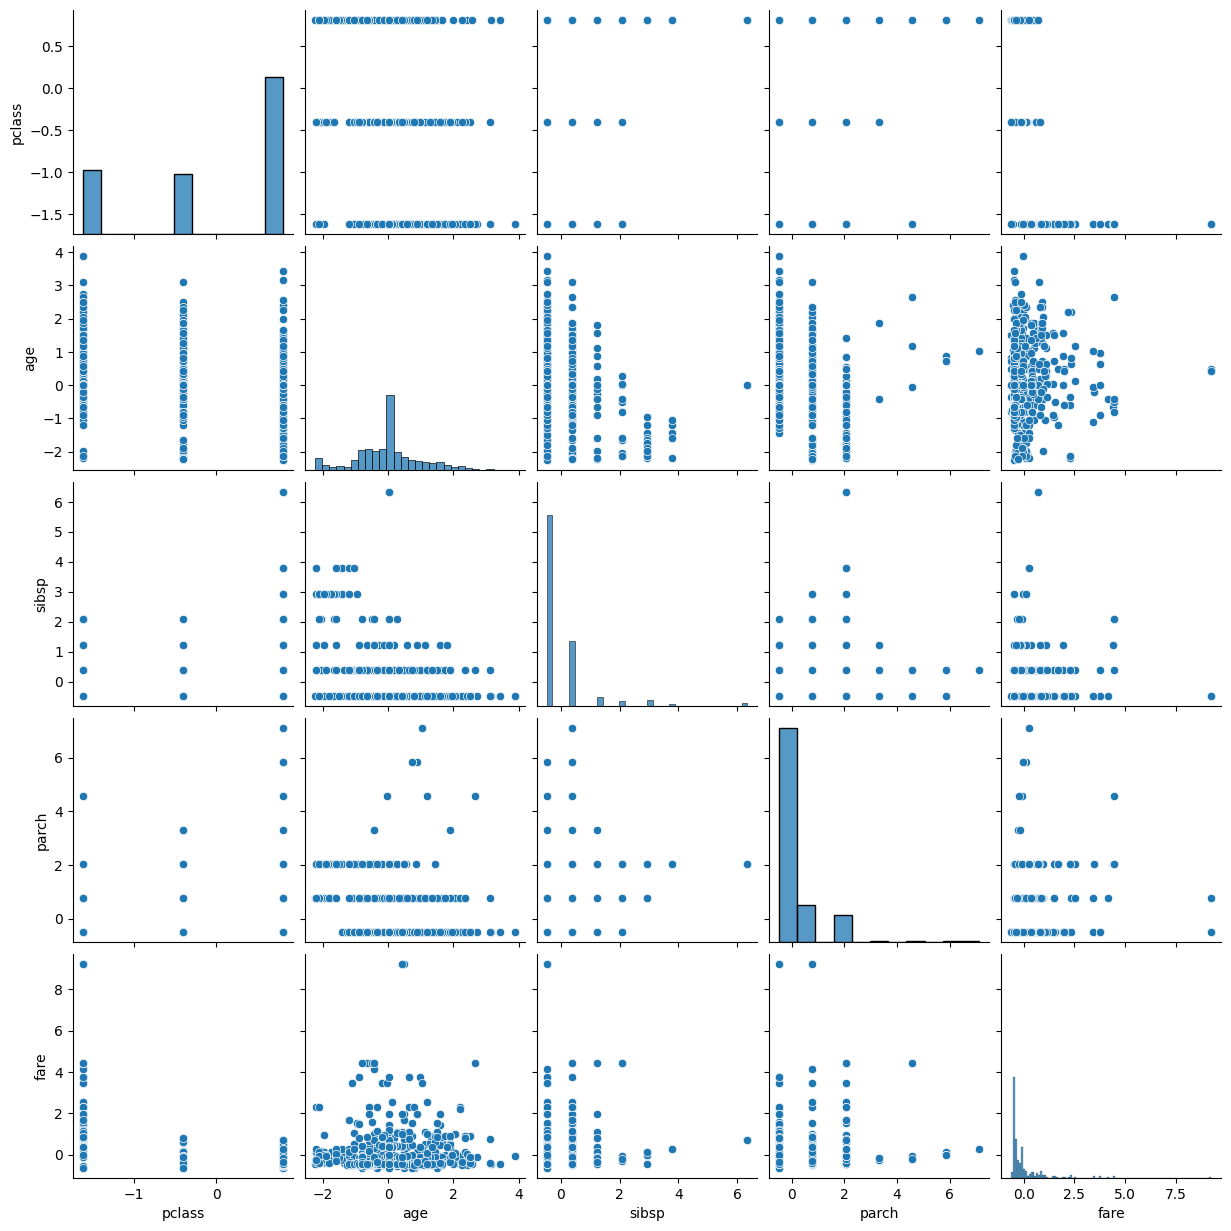

In [37]:
sns.pairplot(X_train_sc)

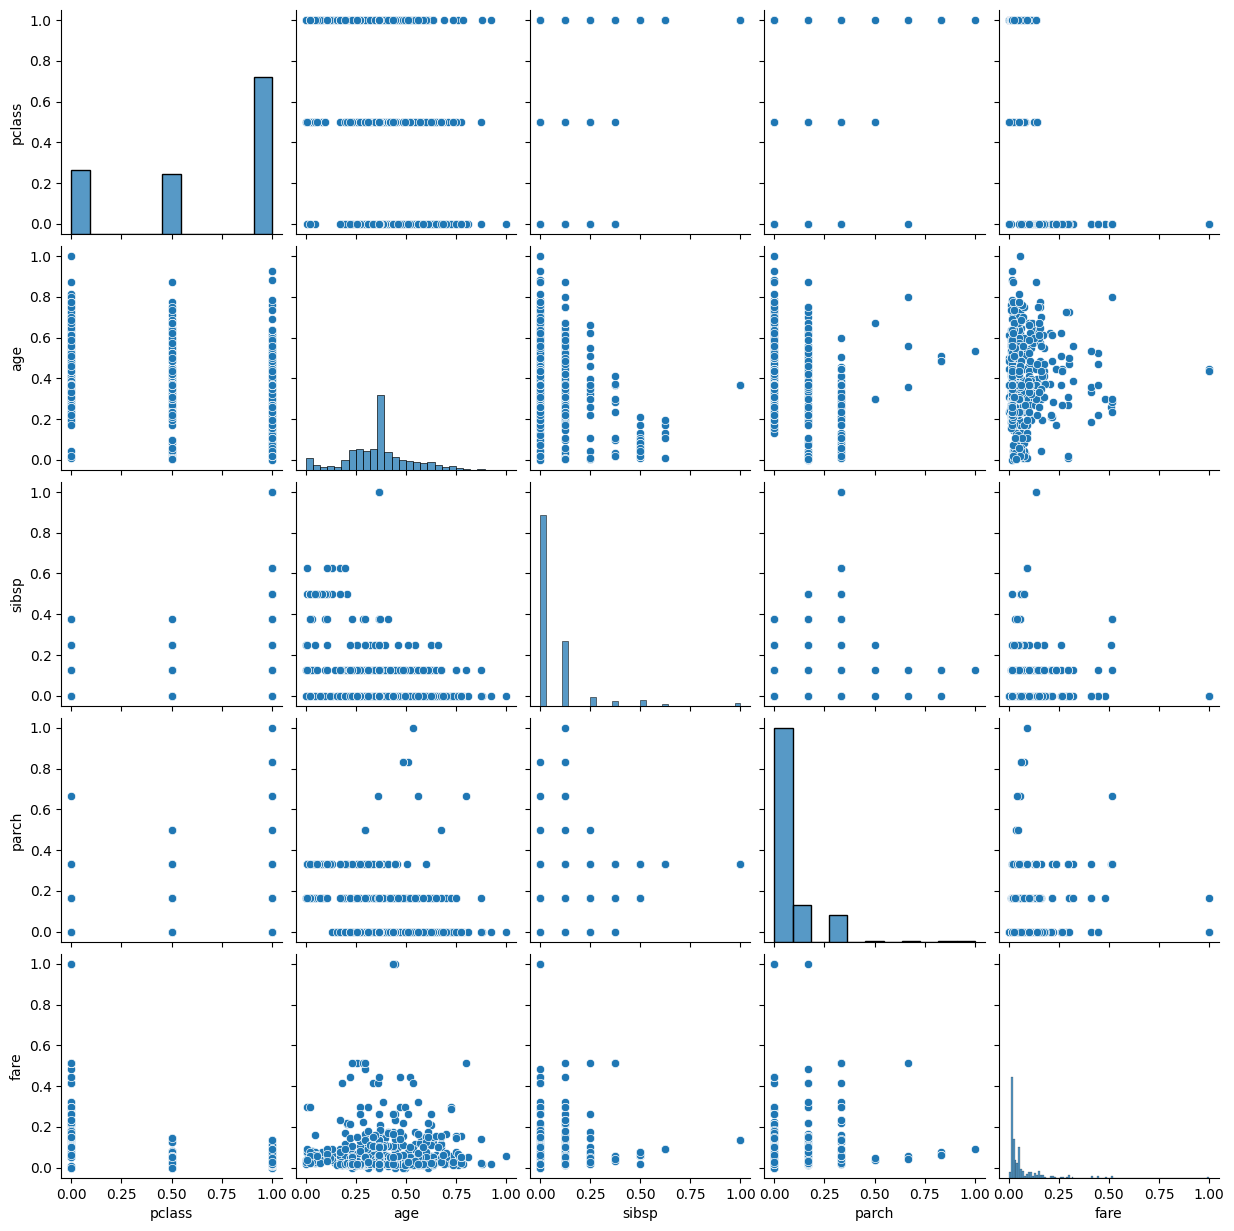

In [38]:
sns.pairplot(X_train_mmc)